# BA4d: Cross-Validation and Model Comparison (Classification)

In this module, we use k-fold cross-validation to evaluate and compare different classifiers on a small 2D classification dataset.
This helps us understand how models perform across multiple data splits and which model generalizes best.

### Step 1: Load predictors and class labels

In [1]:
import pandas as pd
X = pd.read_csv('predictors.csv')
y = pd.read_csv('classes.csv')['x']

### Step 2: Define multiple classifiers to compare

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN (k=5)': KNeighborsClassifier(n_neighbors=5)
}

### Step 3: Run 5-fold cross-validation and compute mean accuracy for each model

In [3]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.3f} | Scores: {scores}")

Logistic Regression: Mean Accuracy = 0.756 | Scores: [0.61904762 0.80952381 0.61904762 0.95121951 0.7804878 ]
Decision Tree: Mean Accuracy = 0.611 | Scores: [0.61904762 0.5        0.66666667 0.68292683 0.58536585]
k-NN (k=5): Mean Accuracy = 0.717 | Scores: [0.5952381  0.73809524 0.64285714 0.92682927 0.68292683]


### Step 4: Visualize accuracy scores using a boxplot

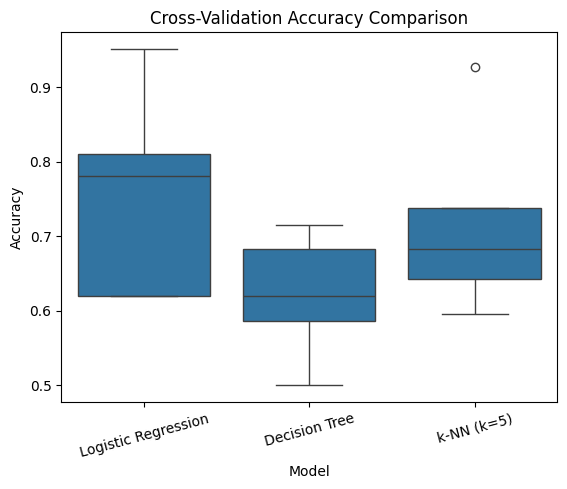

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

results = []
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    for score in scores:
        results.append({'Model': name, 'Accuracy': score})
sns.boxplot(x='Model', y='Accuracy', data=pd.DataFrame(results))
plt.title('Cross-Validation Accuracy Comparison')
plt.xticks(rotation=15)
plt.show()

### Step 5: Interpretation and Model Selection

- A model with high mean accuracy and low variance is generally preferred.
- Decision Trees may overfit small datasets.
- k-NN is sensitive to the choice of `k` and scales better when features are normalized.
- Logistic Regression provides a simple, interpretable decision boundary.

Always consider both performance and stability across folds.

### Step 6: Try these

- Add `scoring='f1_macro'` or `precision` to evaluate beyond accuracy.
- Normalize features before fitting k-NN (use `StandardScaler`).
- Tune hyperparameters using `GridSearchCV`.
- Use `StratifiedKFold` for stratified splits (especially when classes are imbalanced).
- Test more models such as `SVC`, `RandomForestClassifier`, etc.